In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# 처음 10000개의 행만 읽기
train_date_part = pd.read_csv('./bosch-production-line-performance/train_date.csv', nrows=10000)
print(train_date_part.shape)

(10000, 1157)


In [24]:
# 결측값이 아닌 데이터의 개수의 총합 / train_date_part의 전체 원소 수 (행의 수 *열의 수) 
print(1.0*train_date_part.count().sum() / train_date_part.size)

# 0.17 = 17%가 유효한 값이다. (결측치가 아닌 값)

0.17792057044079515


In [25]:
# 데이터프레임의 첫 두 행
train_date_part[:2]

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
train_date_part.columns

Index(['Id', 'L0_S0_D1', 'L0_S0_D3', 'L0_S0_D5', 'L0_S0_D7', 'L0_S0_D9',
       'L0_S0_D11', 'L0_S0_D13', 'L0_S0_D15', 'L0_S0_D17',
       ...
       'L3_S50_D4246', 'L3_S50_D4248', 'L3_S50_D4250', 'L3_S50_D4252',
       'L3_S50_D4254', 'L3_S51_D4255', 'L3_S51_D4257', 'L3_S51_D4259',
       'L3_S51_D4261', 'L3_S51_D4263'],
      dtype='object', length=1157)

In [27]:
# 각 역에 대한 시간 정보만 추출하는 함수
def get_station_times(dates, withId=False):
    times = []
    cols = list(dates.columns)
    # 'Id' 열을 cols에서 제거
    if 'Id' in cols:
        cols.remove('Id')

    for feature_name in cols:
        # withId=True: Id 열이 있을 때
        if withId:
            # 'Id'와 각 역의 시간 데이터를 복사
            df = dates[['Id', feature_name]].copy()
            # 열 이름을 'Id', 'time'으로 변경
            df.columns = ['Id', 'time']

        # withId=False: Id 열이 없을 때
        else:
            # 각 역의 시간 데이터만 복사
            df = dates[[feature_name]].copy()
            # 열 이름을 'time'으로만 변경
            df.columns = ['time']

        # feature_name에서 'station' 부분을 추출
        df['station'] = feature_name.split('_')[1][1:]
        df = df.dropna()
        times.append(df)

    return pd.concat(times)

In [28]:
# 각 Id에 대해 station별로 시간 순서대로 정렬
station_times = get_station_times(train_date_part, withId=True).sort_values(by=['Id','station'])
print(station_times.head())

   Id   time station
0   4  82.24       0
0   4  82.24       0
0   4  82.24       0
0   4  82.24       0
0   4  82.24       0


In [29]:
print(station_times.shape)

(2048541, 3)


In [30]:
# Id와 station별 최소시간을 나타내는 시리즈
min_station_times =station_times.groupby(['Id','station']).min()['time']

# Id와 station별 최대시간을 나타내는 시리즈
max_station_times =station_times.groupby(['Id','station']).max()['time']

In [31]:
# min_station_times와 max_station_times가 동일한 비율
print(np.mean(1. * (min_station_times == max_station_times) ) )

0.9821721580467314


In [32]:
date_cols = train_date_part.drop('Id', axis=1).count().reset_index().sort_values(by=0, ascending=False)

date_cols['station'] = date_cols['index'].apply(lambda s: s.split('_')[1])

date_cols = date_cols.drop_duplicates('station', keep='first')['index'].tolist()

print(date_cols)

['L3_S37_D3949', 'L3_S30_D3821', 'L3_S29_D3437', 'L3_S34_D3879', 'L3_S33_D3872', 'L0_S1_D30', 'L0_S0_D9', 'L0_S8_D147', 'L3_S36_D3932', 'L3_S35_D3897', 'L0_S5_D115', 'L0_S3_D86', 'L0_S6_D120', 'L0_S7_D140', 'L0_S2_D66', 'L0_S4_D106', 'L0_S12_D337', 'L0_S20_D464', 'L0_S13_D355', 'L0_S10_D256', 'L0_S11_D328', 'L0_S9_D167', 'L2_S26_D3093', 'L1_S24_D1847', 'L0_S19_D454', 'L0_S17_D432', 'L0_S14_D364', 'L0_S15_D395', 'L0_S16_D428', 'L2_S27_D3193', 'L0_S18_D451', 'L0_S21_D479', 'L0_S23_D673', 'L0_S22_D588', 'L3_S45_D4129', 'L3_S40_D3983', 'L3_S41_D4019', 'L3_S48_D4197', 'L3_S47_D4185', 'L3_S51_D4255', 'L3_S39_D3966', 'L1_S25_D1864', 'L3_S31_D3836', 'L3_S43_D4082', 'L3_S49_D4218', 'L3_S50_D4250', 'L3_S44_D4110', 'L3_S38_D3961', 'L3_S32_D3852', 'L2_S28_D3308', 'L3_S42_D4057', 'L3_S46_D4135']


In [33]:
train_date = pd.read_csv('./bosch-production-line-performance/train_date.csv', usecols=date_cols)
print(train_date.shape)

(1183747, 52)


In [34]:
train_station_times = get_station_times(train_date, withId=False)
print(train_station_times.shape)

(14303033, 2)


In [35]:
train_time_cnt = train_station_times.groupby('time').count()[['station']].reset_index()
train_time_cnt.columns = ['time', 'cnt']
print(train_time_cnt.shape)

(101363, 2)


In [37]:
test_date = pd.read_csv('./bosch-production-line-performance/test_date.csv', usecols=date_cols)
print(test_date.shape)

(1183748, 52)


In [38]:
test_station_times = get_station_times(test_date, withId=False)
print(test_station_times.shape)

(14308431, 2)


In [39]:
test_time_cnt = test_station_times.groupby('time').count()[['station']].reset_index()
test_time_cnt.columns = ['time', 'cnt']
print(test_time_cnt.shape)

(101279, 2)


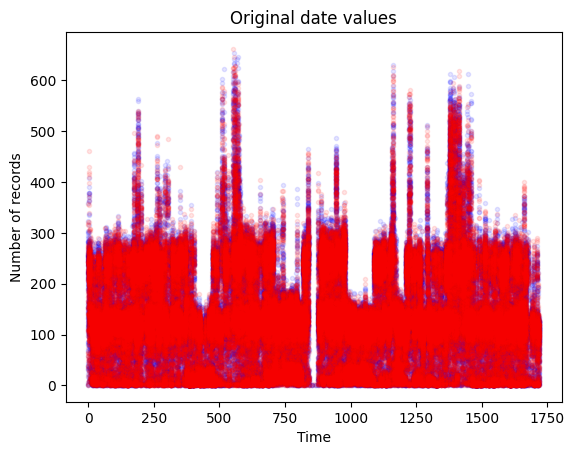

In [40]:
fig = plt.figure()
plt.plot(train_time_cnt['time'].values, train_time_cnt['cnt'].values, 'b.', alpha=0.1, label='train')
plt.plot(test_time_cnt['time'].values, test_time_cnt['cnt'].values, 'r.', alpha=0.1, label='test')
plt.title('Original date values')
plt.ylabel('Number of records')
plt.xlabel('Time')
fig.savefig('original_date_values.png', dpi = 300)
plt.show()

In [41]:
print((train_time_cnt['time'].min(), train_time_cnt['time'].max()))
print((test_time_cnt['time'].min(), test_time_cnt['time'].max()))

(np.float64(0.0), np.float64(1718.48))
(np.float64(0.0), np.float64(1718.49))


1. Train and test set has the same time period


2. There is a clear periodic pattern


3. The dates are transformed to 0 - 1718 with granularity of 0.01


4. There is a gap in the middle

In [42]:
time_ticks = np.arange(train_time_cnt['time'].min(), train_time_cnt['time'].max() + 0.01, 0.01)
time_ticks = pd.DataFrame({'time': time_ticks})
time_ticks = pd.merge(time_ticks, train_time_cnt, how='left', on='time')
time_ticks = time_ticks.fillna(0)

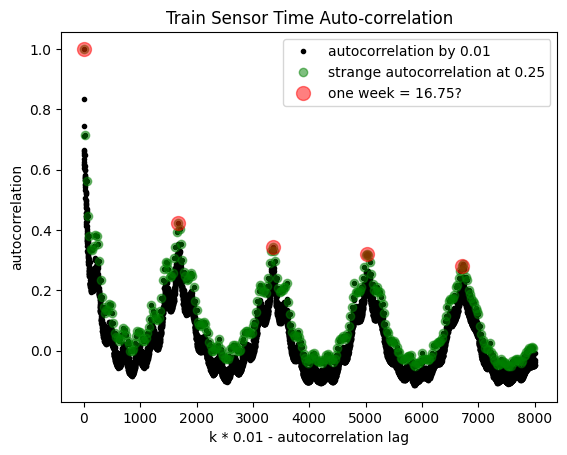

In [43]:
x = time_ticks['cnt'].values

# 지연값(lag)은 자기상관을 계산할 때 데이터를 얼마나 뒤로 미룰지 결정.
max_lag = 8000  # 최대 지연값. 클수록 더 긴 범위의 자기상관을 확인할 수 있음.

# 지연값을 1부터 7999까지 설정
auto_corr_ks = range(1, max_lag)

# x 배열의 첫 번째 부분과 두 번째 부분의 상관계수를 계산
auto_corr = np.array([1] + [np.corrcoef(x[:-k], x[k:])[0,1] for k in auto_corr_ks])

# 자기상관은 데이터가 시간에 따라 얼마나 비슷한 값을 가지는지를 측정(주기적 패턴)
fig = plt.figure()
plt.plot(auto_corr, 'k.', label='autocorrelation by 0.01')

period = 25
auto_corr_ks = list(range(period, max_lag, period))
auto_corr = np.array([1] + [np.corrcoef(x[:-k], x[k:])[0,1] for k in auto_corr_ks])
plt.plot([0] + auto_corr_ks, auto_corr, 'go', alpha=0.5, label='strange autocorrelation at 0.25')

period = 1675
auto_corr_ks = list(range(period, max_lag, period))
auto_corr = np.array([1] + [np.corrcoef(x[:-k], x[k:])[0,1] for k in auto_corr_ks])
plt.plot([0] + auto_corr_ks, auto_corr, 'ro', markersize=10, alpha=0.5, label='one week = 16.75?')

plt.title('Train Sensor Time Auto-correlation')
plt.xlabel('k * 0.01 - autocorrelation lag')
plt.ylabel('autocorrelation')
plt.legend(loc=0)
fig.savefig('train_time_auto_correlation.png', dpi = 300)
plt.show()

The largest peaks are at approximately 1680 ticks. Assume its a week.


In each week we could see 7 local maxima ~ days

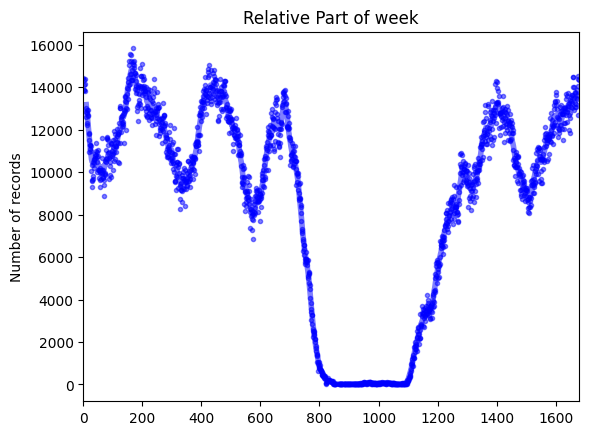

In [44]:
# 주간 패턴 시각화

week_duration = 1679
train_time_cnt['week_part'] = ((train_time_cnt['time'].values * 100) % week_duration).astype(np.int64)
  
# Aggregate weekly stats
train_week_part = train_time_cnt.groupby(['week_part'])[['cnt']].sum().reset_index()

fig = plt.figure()
plt.plot(train_week_part.week_part.values,
         train_week_part.cnt.values,
         'b.', alpha=0.5, label='train count')

# 20개의 데이터에 대해 이동 평균
# 이동 평균 : 짧은 기간 동안의 변동을 평활화하여 장기적인 패턴을 더 잘 볼 수 있도록 
y_train = train_week_part['cnt'].rolling(window=20, center=True).mean().values
plt.plot(train_week_part.week_part.values, 
         y_train,
         'b-',
         linewidth=4,
         alpha=0.5,
         label='train count smooth')
plt.title('Relative Part of week')
plt.ylabel('Number of records')
plt.xlim(0, 1680)
fig.savefig('week_duration.png', dpi=300)

### 2. XGBoost

In [ ]:
date_chunks = pd.read_csv("./bosch-production-line-performance/train_date.csv", index_col=0, chunksize=100000, dtype=np.float32)
num_chunks = pd.read_csv("./bosch-production-line-performance/train_numeric.csv", index_col=0,
                         usecols=list(range(969)), chunksize=100000, dtype=np.float32)
X = pd.concat([pd.concat([dchunk, nchunk], axis=1).sample(frac=0.05)
               for dchunk, nchunk in zip(date_chunks, num_chunks)])
y = pd.read_csv("./bosch-production-line-performance/train_numeric.csv", index_col=0, usecols=[0,969], dtype=np.float32).loc[X.index].values.ravel()
X = X.values

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import matthews_corrcoef, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
clf =XGBClassifier(base_score=0.005)
clf.fit(X, y)

In [ ]:
plt.hist(clf.feature_importances_[clf.feature_importances_>0])
importance_indices = np.where(clf.feature_importances_>0.005)[0]
print(importance_indices)

## 3.

### 1. Target Value Distribution

데이터 로딩 후, 클래스 불균형 문제를 파악합니다.

Response
0    0.996
1    0.004
Name: proportion, dtype: float64


<Axes: xlabel='count', ylabel='Response'>

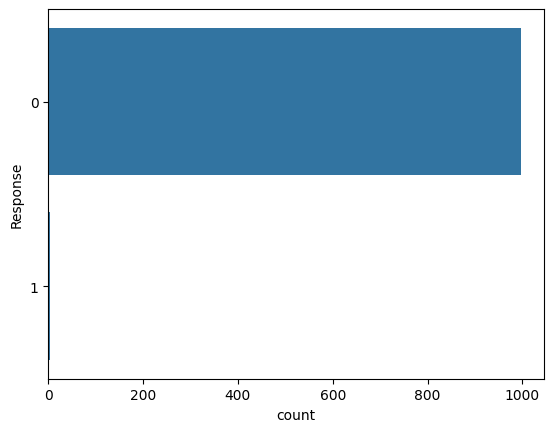

In [75]:
# Target Value Distribution
train_numeric_part = pd.read_csv("./bosch-production-line-performance/train_numeric.csv.zip", nrows=1000)

# 각 Response 값이 데이터에 얼마나 자주 등장하는지 비율로 (클래스 불균형)
print(train_numeric_part.Response.value_counts(normalize=True))

sns.countplot(data=train_numeric_part, y='Response')

# 0(정상) : 99.6%
# 1(불량) : 0.4% 
# 극심한 클래스 불균형 -> 분석이 어려움.

### 2. 대용량 데이터 처리
데이터의 메모리 사용량을 줄이고, 필요한 부분만 가져오며 처리합니다.

In [81]:
# 전체 컬럼 구조를 가져오기 위해 처음에 일부 데이터만 읽어옵니다.
sample_df = pd.read_csv('./bosch-production-line-performance/train_numeric.csv.zip', nrows=10)
columns = sample_df.columns

# 결측치 비율 계산을 위한 초기값 설정
missing_ratio = pd.Series(index=columns, data=np.zeros(len(columns)))
length = 0

# chunk 단위로 데이터를 읽어 결측치 비율을 누적 계산
for chunk in pd.read_csv('./bosch-production-line-performance/train_numeric.csv.zip', chunksize=10000):
    missing_ratio += chunk.isnull().sum()  # 결측치 합계 누적
    length += len(chunk)                   # 전체 행 수 누적

# chunk 단위로 데이터를 불러와서 결측치와 평균값 계산

### 3. 결측치 분석 및 제거
결측치 비율이 높은 컬럼을 분석하고, 50% 이상 결측치를 가진 컬럼을 제거합니다.

In [82]:
# 전체 데이터의 결측치 비율 계산
missing_ratio = missing_ratio / length

use_cols = missing_ratio[missing_ratio <= 0.5].index

# 970개 컬럼 중 50% 이상이 결측치인 컬럼 제외

### 4. 차원 축소 (PCA)
PCA를 활용하여 차원의 저주를 해결하고 데이터의 차원을 줄입니다.

In [83]:
print(len(missing_ratio))
print(train_numeric_part.shape)

970
(1000, 158)


In [84]:
from sklearn.decomposition import PCA

data = pd.read_csv('./bosch-production-line-performance/train_numeric.csv.zip', usecols=use_cols)
data = data.fillna(0)

# Id와 Response를 별도로 저장하고 나머지 데이터를 PCA에 사용
ids = data["Id"]
responses = data["Response"]
data = data.drop(columns=["Id", "Response"])

# PCA를 통해 차원을 축소
pca = PCA(n_components=6)
X = pca.fit_transform(data)
pca_df = pd.DataFrame(data=X, columns=[f"PC{i}" for i in range(1, 7)])

# 158개 컬럼에서 PCA를 통해 6개이 차원으로 축소 -> 데이터 복잡성 줄이고, 과적합 방지, 학습 속도 up

### 5. 불량 검출 문제 해결 (클래스 불균형 처리)
클래스 불균형 문제를 해결하기 위해 샘플링 기법(언더샘플링, 오버샘플링)을 사용합니다.

In [85]:
from imblearn.over_sampling import SMOTE

X = pca_df
y = responses

sm = SMOTE()
X_oversampled, y_oversampled = sm.fit_resample(X, y)

print(X_oversampled.shape, y_oversampled.shape)

# 불량 클래스 오버샘플링

(2353736, 6) (2353736,)


### 6. 이상치 탐지
IQR 방법을 사용하여 이상치를 검출합니다.

1. 이상치 탐지 방법    
    1) IQR(Interquartile Range)
        - 1사분위수(Q1)와 3사분위수(Q3) 사의의 범위(IQR)를 기준으로 이상치를 탐지
        - Q1 - 1.5*IQR보다 작거나 Q3 + 1.5*IQR보다 큰 값을 이상치로 간주.
        - 데이터가 정규 분포에 가까울 때 효과적

    2) Z-score(표준화 점수)
        - 데이터의 평균과 표준편차를 기반으로 각 값이 평균에서 얼마나 떨어져 있는지 측정
        - Z-score가 3 이상이거나 -3 이하인 값을 이상치로 간주
        - 정규 분포를 가정, 데이터가 대칭 분포일 때 효과적

    3) MAD(Median Absolute Deviation)
        - 중앙값을 기준으로 절대 편차를 구해 이상치를 탐지
        - k * MAD 이상 떨어져 있으면 이상치로 간주 
        - 이상치에 강건한(robust) 방법, 비대칭 분포에서도 사용가능
        - 데이터에 이상치가 많을 때

    4) Isolation Forest
        - 이상치를 탐지하는 기계 학습 방법
        - 랜덤하게 데이터를 분할하여 고립된 데이터를 이상치로 간주
        - 고립된 정도가 높은 데이터를 이상치로 간주
        - 대용량 / 고차원 데이터에 적합

    5) LOF(Local Outlier Factor)
        - 데이터의 밀도를 기반으로 다른 데이터와 얼마나 다른지 계산하여 이상치를 탐지
        - 밀도가 낮은 데이터를 이상치로 간주
        - 데이터의 밀도를 고려해 지역적 이상치를 탐지
        - 이상치가 국지적으로 존재할 때 효과적
-----------
2. 이상치 처리 방법
    1) 이상치 제거
        - 이상치를 발견한 후 해당 데이터를 제거
        - 이상치가 데이터의 오류로 간주될 때
        - 이상치가 분석 결과에 큰 영향을 미칠 때
        - 데이터 손실이 발생, 이상치의 수가 너무 많을 경우 x

    2) 이상치 대체 (값 변환)
        - 이상치를 평균, 중앙값, 또는 최빈값과 같은 다른 값으로 대체
        - 이사이가 데이터의 오류가 아니고 분석에 중요한 정보를 포함할 가능성이 있을 때
        - 대체할 값을 선택할 때, 데이터의 분포와 특성을 고려해야 함

    3) 로깅 및 수정
        - 이상치를 수정하기 전에 데이터의 원인이나 패턴을 파악해 로그에 기록하고, 수정이 필요할 때만 변경
        - 이상치가 특정 상황에서 의미 있는 경우
        - 수정 과정이 데이터의 의미를 바꿀 수 있음

    4) 비닝(Binning) 또는 범주화
        - 이상치를 포함한 값을 일정한 범주로 묶어 처리
        - 연속형 데이터의 이상치를 그룹화하여 이상치가 분석에 미치는 영향을 줄이고 싶을 때
        - 연속 데이터의 정밀도가 줄어들 수 있음

    5) 모델 기반 처리
        - 이상치를 허용하는 모델을 적용하여 이상치를 직접 처리하지 않고, 모델이 이상치를 무시하도록 설정
        - 이상치를 포함한 데이터를 모두 사용하면서, 모델의 정확성을 높이고 싶을 때
        - 이상치가 많은 경우, 모델의 성능이 떨어질 수 있음

    6) Winsorization
        - 이상치를 상하 경계선으로 고정하는 방법
        - 극단값의 영향을 줄이고 싶을 때 사용
        - 이상치가 많으면 왜곡이 발생할 수 있음
    

In [89]:
train_numeric_part.columns

Index(['Id', 'L0_S0_F0', 'L0_S0_F2', 'L0_S0_F4', 'L0_S0_F6', 'L0_S0_F8',
       'L0_S0_F10', 'L0_S0_F12', 'L0_S0_F14', 'L0_S0_F16',
       ...
       'L3_S33_F3873', 'L3_S34_F3876', 'L3_S34_F3878', 'L3_S34_F3880',
       'L3_S34_F3882', 'L3_S37_F3944', 'L3_S37_F3946', 'L3_S37_F3948',
       'L3_S37_F3950', 'Response'],
      dtype='object', length=158)

In [90]:
def IQR_outlier(data, column):
    temp = data[column].dropna()
    q25 = np.percentile(temp, 25)
    q75 = np.percentile(temp, 75)
    IQR = q75 - q25
    lower_bound = q25 - IQR * 1.5
    upper_bound = q75 + IQR * 1.5
    return temp[(temp < lower_bound) | (temp > upper_bound)]

outliers = IQR_outlier(train_numeric_part, "L0_S0_F0")
print(outliers)

# Index  Value
# 15     0.252
# 56    -0.251
# 158   -0.225
# 505    0.219
# Name: L0_S0_F0, dtype: float64

15     0.252
56    -0.251
158   -0.225
505    0.219
Name: L0_S0_F0, dtype: float64


### 7. 날짜 데이터 분석
특정 시작(station)과 끝(station)을 찾는 과정을 통해 'train_date' 데이터를 요약합니다.

In [94]:
# 데이터를 일부 로드 (실제 분석에서는 전체 데이터를 로드)
train_date_part = pd.read_csv("./bosch-production-line-performance/train_date.csv.zip", nrows=1000)

# 각 행의 시작과 끝 station을 담을 컬럼 초기화
train_date_part["start_station"] = ""
train_date_part["end_station"] = ""

# 각 row에 대해 처음과 마지막 측정된 station을 찾기
for i in range(len(train_date_part)):
    row = train_date_part.iloc[i, 1:]  # Id를 제외한 나머지 컬럼 선택
    
    start_station = row.first_valid_index()  # 첫 번째 NaN이 아닌 컬럼명
    end_station = row.last_valid_index()     # 마지막 NaN이 아닌 컬럼명
    
    # 시작과 끝 station 이름을 각각 추출하여 지정
    if start_station:
        train_date_part.at[i, "start_station"] = start_station.split("_")[1]
    if end_station:
        # 정확한 station 정보만 가져오기 위해 split의 결과를 검토
        end_station_name = end_station.split("_")
        if len(end_station_name) > 1:
            train_date_part.at[i, "end_station"] = end_station_name[1]

# 결과 확인
display(train_date_part[["Id", "start_station", "end_station"]])

,Id,start_station,end_station
0,4,S0,station
1,6,S12,station
2,7,S0,station
3,9,S0,station
4,11,S0,station
...,...,...,...
995,2044,S24,station
996,2046,S25,station
997,2050,S0,station
998,2053,S0,station
